### importing dependencies

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### creating path
### loading files
### creating empty pandas dataframe
### adding data to dataframe and concating path with file

In [50]:
path="C:/Users/gretc/OneDrive/Desktop/webdevelopment/individual_stocks_5yr"
company_list=["AAPL_data.csv","GOOG_data.csv","MSFT_data.csv","AMZN_data.csv"]
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+"/"+file)
    all_data=pd.concat([all_data,current_df])
print(all_data)

            date       open       high        low      close     volume  Name
0     2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL
1     2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL
2     2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL
3     2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL
4     2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL
...          ...        ...        ...        ...        ...        ...   ...
1254  2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN
1255  2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN
1256  2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN
1257  2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN
1258  2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN

[4752 rows x 7 columns]


In [51]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [52]:
all_data["date"]=pd.to_datetime(all_data["date"])

In [53]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [54]:
tech_list=all_data['Name'].unique()

### because of overlap added custom figure sizes
### creating for loop and turning data values into an enumerate object
### ploting the closing price for each day on a chart for each company
### giving each chart a title

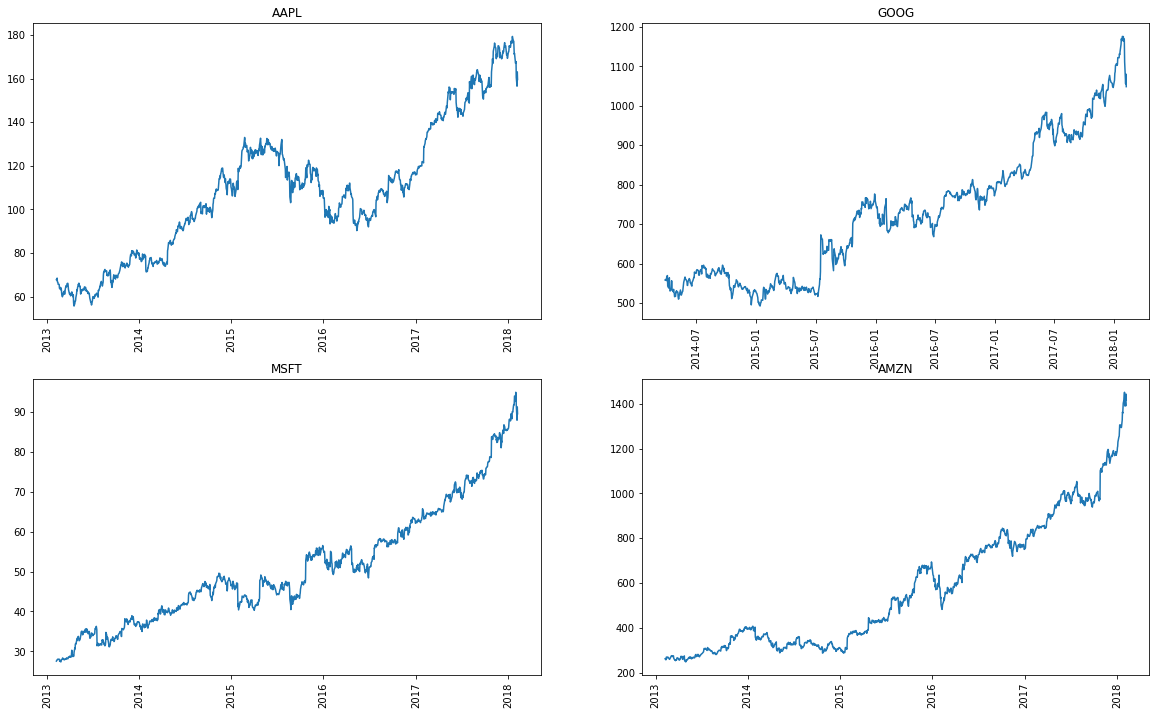

In [55]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data["Name"]==company]
    plt.plot(df["date"],df["close"])
    plt.xticks(rotation="vertical")
    plt.title(company)

In [56]:
import plotly.express as px

### Importing company and using plotly to show invidual company volume

In [57]:
for company in tech_list:
    df=all_data[all_data["Name"]==company]
    fig=px.line(df,x="date",y="volume",title=company)
    fig.show()

In [58]:
df=pd.read_csv("C:/Users/gretc/OneDrive/Desktop/webdevelopment/individual_stocks_5yr/AAPL_data.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [59]:
df['Daily_Price_Change']=df['close']-df['open']
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [60]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [63]:
fig=px.line(df,x='date',y='1day % return',title='AAPL')
fig.show()

In [64]:
df2=df.copy()

In [65]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_Change    float64
1day % return         float64
dtype: object

In [67]:
df2['date']=pd.to_datetime(df2['date'])

In [68]:
df2.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily_Price_Change           float64
1day % return                float64
dtype: object

### setting index for date

In [81]:
df2.set_index('date', inplace=True)

In [82]:
df2.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [83]:
df2['2016-08-22':'2016-08-30']

,open,high,low,close,volume,Name
date,,,,,,
2016-08-22,108.860,109.10,107.85,108.51,25820230,AAPL
2016-08-23,108.590,109.32,108.53,108.85,21257669,AAPL
2016-08-24,108.565,108.75,107.68,108.03,23675081,AAPL
2016-08-25,107.390,107.88,106.68,107.57,25086248,AAPL
2016-08-26,107.410,107.95,106.31,106.94,27766291,AAPL
2016-08-29,106.620,107.44,106.29,106.82,24970300,AAPL
2016-08-30,105.800,106.50,105.50,106.00,24863945,AAPL


### used the resample method to change the frequency from daily to monthly

<AxesSubplot:xlabel='date'>

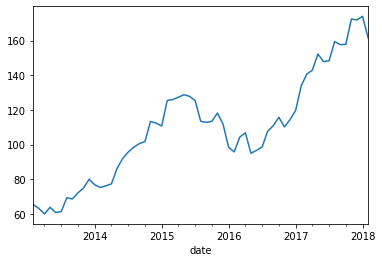

In [85]:
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

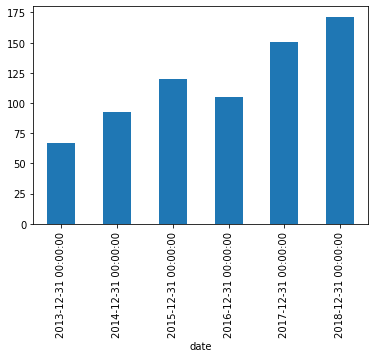

In [92]:
df2['close'].resample('Y').mean().plot(kind='bar')

<AxesSubplot:xlabel='date'>

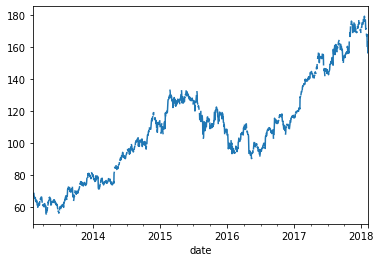

In [90]:
df2['close'].resample('D').mean().plot()

In [93]:
appl=pd.read_csv('C:/Users/gretc/OneDrive/Desktop/webdevelopment/individual_stocks_5yr/AAPL_data.csv')
appl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [94]:
amzn=pd.read_csv('C:/Users/gretc/OneDrive/Desktop/webdevelopment/individual_stocks_5yr/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [95]:
goog=pd.read_csv('C:/Users/gretc/OneDrive/Desktop/webdevelopment/individual_stocks_5yr/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [96]:
msft=pd.read_csv('C:/Users/gretc/OneDrive/Desktop/webdevelopment/individual_stocks_5yr/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [97]:
close=pd.DataFrame()

In [99]:
close['appl']=appl['close']
close['amzn']=amzn['close']
close['goog']=goog['close']
close['msft']=msft['close']

In [100]:
close.head()

,appl,amzn,goog,msft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04


In [101]:
import seaborn as sns

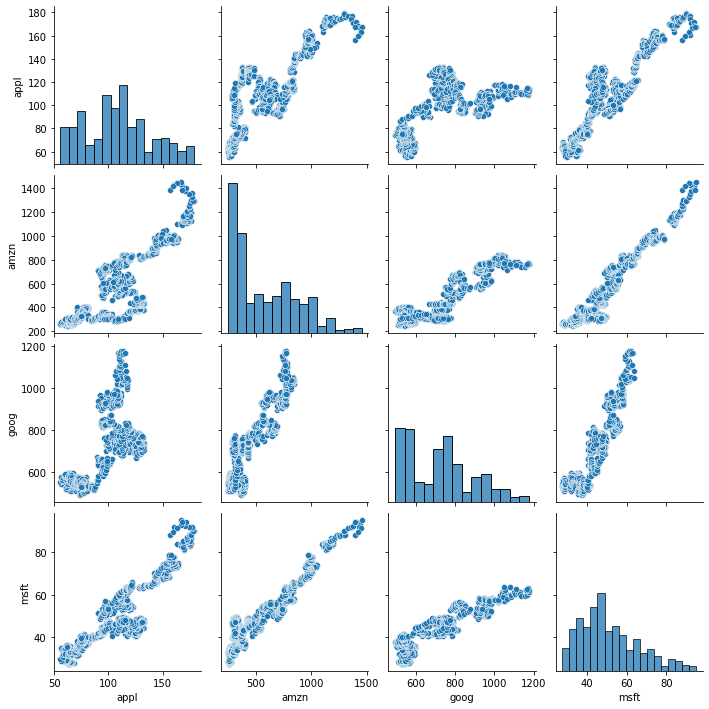

In [102]:
sns.pairplot(data=close)

<AxesSubplot:>

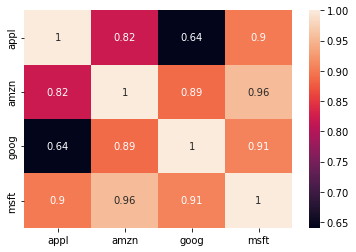

In [104]:
sns.heatmap(close.corr(),annot=True)